In [1]:
import BenchmarkTools: @btime, @benchmark;

import Pkg: activate, build
activate("../GSHEIntegrator/.")
import GSHEIntegrator;


import Plots
using LaTeXStrings
using Measures
using NPZ

  Activating project at `~/Projects/birefringence/GSHEIntegrator`
┌ Info: Precompiling GSHEIntegrator [95376d2f-314f-47c4-97a6-da6eee6a3a26]
└ @ Base loading.jl:1423


In [268]:
geometry = GSHEIntegrator.setup_geometry(Float64;
   rsource=30, θsource=π/2, ϕsource=0,
   robs=5000, θobs=π/2, ϕobs=π, a=0.0);
ϵ = 0.9
s = 2
geometry.ode_options.no_loops = false
geometry.ode_options.Δθ = 0.0001
geometry.ode_options.horizon_tol = 1.001
geometry.ode_options.maxiters = 10000

10000

In [269]:
function find_endpoint(dir::Vector{<:Real}, solver::Function, geometry::GSHEIntegrator.Geometry)
    sol = solver(dir)
    r, θ, ϕ = sol[2:4, end]
    rtol = geometry.opt_options.radius_reltol

    if ~isapprox(r, geometry.observer.r)
        return NaN
    end

    ϕ < 0 ? (ϕ += 2π) : nothing

    return θ, ϕ
end

find_endpoint (generic function with 2 methods)

In [270]:
N = 100000

init_dirs = mapreduce(permutedims, vcat, [GSHEIntegrator.rvs_sphere() for i in 1:N])

ϵ = 0.9

# ϵs = (10).^LinRange(-1.5, 0, 10)
# Δσ = []

# for (j, ϵ) in enumerate(ϵs)
# println("Iteration $j"); flush(stdout)
solver(dir::Vector{<:Real}) = GSHEIntegrator.solve_gshe(dir, geometry, ϵ, s)
endpoints = zero(init_dirs)

Threads.@threads for i in 1:N
    endpoints[i, :] .= find_endpoint(init_dirs[i, :], solver, geometry)
end

# m = .~isnan.(endpoints[:, 1])
# X = endpoints[m, :]

    # push!(Δσ, minimum(GSHEIntegrator.angdist(X[i, :], [0.5π, π]) for i in 1:size(X, 1)))
# end

┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/richard/.julia/packages/SciMLBase/GW7GW/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/richard/.julia/packages/SciMLBase/GW7GW/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/richard/.julia/packages/SciMLBase/GW7GW/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/richard/.julia/packages/SciMLBase/GW7GW/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/richard/.julia/packages/SciMLBase/GW7GW/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/richard/.julia/packages/SciMLBase/GW7GW/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/richard/.julia/packages/SciMLBase/GW7GW/src/integrator_interface

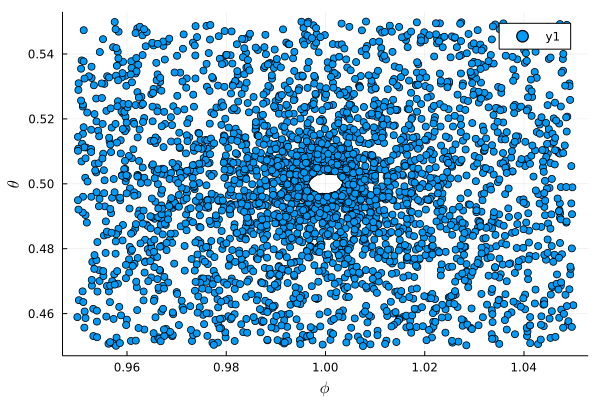

In [271]:
fig = Plots.plot(xlabel=L"\phi", ylabel=L"\theta", dpi=300, rasterize=true)

m = (abs.(endpoints[:, 2] .- 1π) .< 0.05π) .& (abs.(endpoints[:, 1] .- 0.5π) .< 0.05π)

# m = (endpoints[:, 2] .> 0.5π) .& (endpoints[:, 2] .< 1.5π)

Plots.scatter!(endpoints[m, 2] ./ π, endpoints[m, 1]/π)

Plots.savefig(fig, "~/Downloads/hole.png")

display(fig)

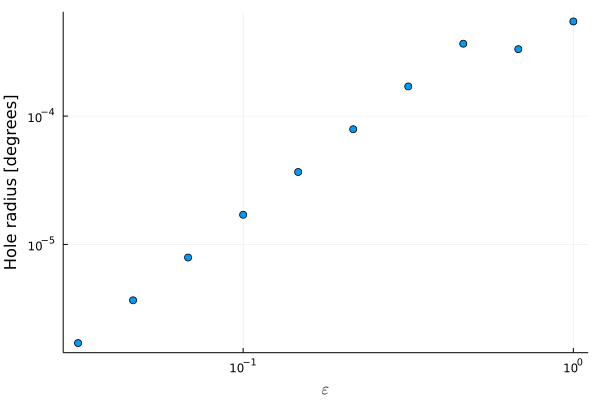

In [259]:
fig = Plots.plot(xscale=:log10, yscale=:log10, xlabel=L"\epsilon",
                 ylabel="Hole radius [degrees]", dpi=300)
Plots.scatter!(fig, ϵs, π * Δσ.^2 ./ (4π),  label=nothing)

# Plots.savefig(fig, "~/Downloads/hole_sizing.png")

display(fig)

In [ ]:
X = endpoints[m, :]




Δσ = [GSHEIntegrator.angdist(X[i, :], [0.5π, π]) for i in 1:size(X, 1)]

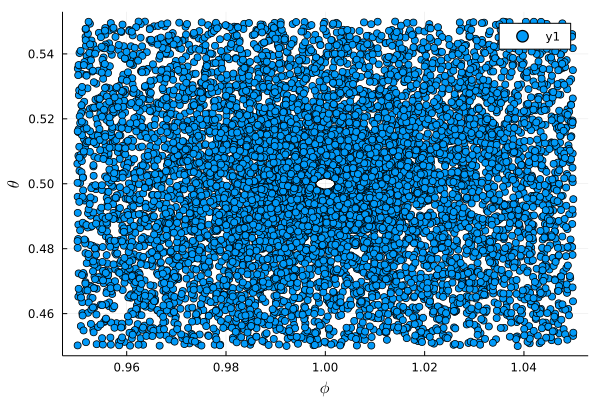

In [217]:
fig = Plots.plot(xlabel=L"\phi", ylabel=L"\theta", dpi=300, rasterize=true)

m = (abs.(endpoints[:, 2] .- 1π) .< 0.05π) .& (abs.(endpoints[:, 1] .- 0.5π) .< 0.05π)

# m = (endpoints[:, 2] .> 0.5π) .& (endpoints[:, 2] .< 1.5π)

Plots.scatter!(endpoints[m, 2] ./ π, endpoints[m, 1]/π)

Plots.savefig(fig, "~/Downloads/hole.png")

display(fig)

In [222]:
X = endpoints[m, :]



Δσ = [GSHEIntegrator.angdist(X[i, :], [0.5π, π]) for i in 1:size(X, 1)]

8827-element Vector{Float64}:
 0.051351297886383866
 0.14124769125282913
 0.10144460431879253
 0.14252128657343918
 0.015930081851329825
 0.046365189816861344
 0.16420881721098357
 0.06203927419269502
 0.11582976137734244
 0.08566253586157538
 0.0699661707685622
 0.057416057618461656
 0.0852218465344069
 ⋮
 0.1288321893454218
 0.08478242669711811
 0.1893137431195058
 0.1579823815668875
 0.042466745330436935
 0.17391829771264328
 0.16712108826090172
 0.14776933474536522
 0.017938810573789397
 0.008256430001904522
 0.05536261647806488
 0.14098856886226122

In [230]:
minimum(Δσ)

0.008251980483899796